In [1]:
import pandas as pd
import numpy as np

In [20]:


# Create a DataFrame with 1000 rows and 4 columns
df = pd.DataFrame({
    'X1': np.random.randint(-100, 501, size=1000),
    'X2': np.random.uniform(0, 1, size=1000),
    'X3': np.random.randint(0, 10, size=1000),
    'X4': np.random.choice(['A', 'B', 'C'], size=1000),
    'X5': np.random.choice(['True','False'], size=1000)
})



,X1,X2,X3,X4,X5,X2bis,Y
0,329,0.154843,6,A,False,0.077421,1616.742141
1,131,0.655631,5,C,True,1.311262,761.126205
2,143,0.333411,8,C,True,0.666823,717.682283
3,461,0.282318,8,C,False,0.564637,2297.463654
4,275,0.205247,3,C,False,0.410494,1407.049444


In [83]:
n_size = 10
df = pd.DataFrame({
    'X1': np.random.randint(-100, 501, size=n_size),
    'X2': np.random.uniform(0, 1, size=n_size),
    'X3': np.random.randint(0, 10, size=n_size),
    'X4': np.random.choice(['A', 'B', 'C'], size=n_size),
    'X5': np.random.choice(['True','False'], size=n_size)
})

df.to_excel('inference_quali.xlsx', index=False)

In [25]:
# Calculate the fourth column 'Y' using the given formula
df['X2bis'] = np.where(df['X4'] == 'A', df['X2'] * 0.5,
               np.where(df['X4'] == 'B', df['X2'] * 1,
               np.where(df['X4'] == 'C', df['X2'] * 2, df['X2'])))

biais = np.where(df['X5'] == 'True', -200, 0)
df['Y'] = 5 * df['X1'] + 100 * df['X2bis'] - df['X3'] ** 2 + biais

df.head()

,X1,X2,X3,X4,X5,X2bis,Y
0,329,0.154843,6,A,False,0.077421,1616.742141
1,131,0.655631,5,C,True,1.311262,561.126205
2,143,0.333411,8,C,True,0.666823,517.682283
3,461,0.282318,8,C,False,0.564637,2297.463654
4,275,0.205247,3,C,False,0.410494,1407.049444


In [26]:
df.drop('X2bis', axis=1, inplace=True)


In [27]:
df.head()

,X1,X2,X3,X4,X5,Y
0,329,0.154843,6,A,False,1616.742141
1,131,0.655631,5,C,True,561.126205
2,143,0.333411,8,C,True,517.682283
3,461,0.282318,8,C,False,2297.463654
4,275,0.205247,3,C,False,1407.049444


In [28]:
df.to_excel('data_var_quali.xlsx', index=False)

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_excel('Donnees.xlsx')
X = data.drop('y', axis=1)
y = data['y']
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [7]:
print(X_scaled.shape, y_scaled.ravel().shape)
print(y_train.flatten().shape, y_test.flatten().shape)

(500, 3) (500,)
(400,) (100,)


In [8]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [9]:
y_pred = model.predict(X_test)
y_test_inv = y_scaler.inverse_transform(y_test)
y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

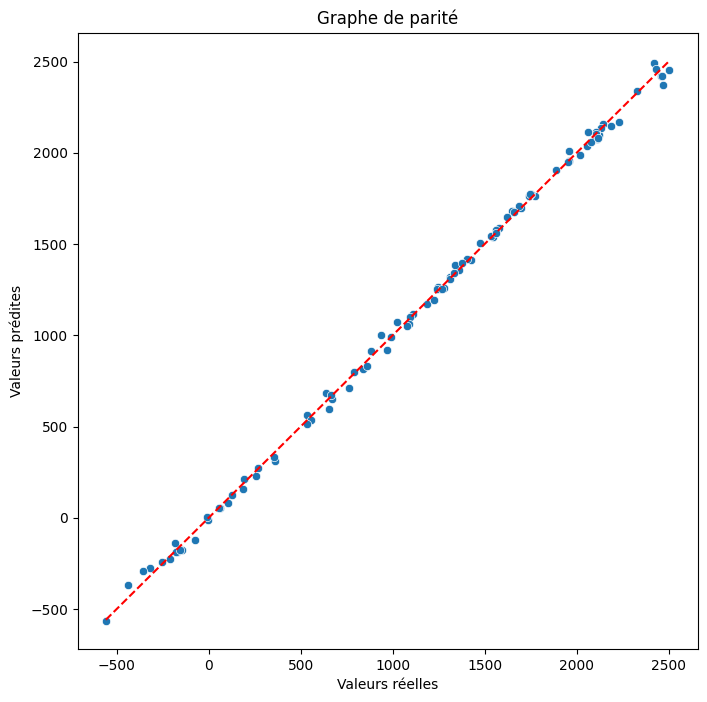

In [10]:
# Tracer le graphe de parité
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test_inv.flatten(), y=y_pred_inv.flatten())
# Tracer la ligne y = x pour référence
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red', linestyle='--')

        # Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphe de parité')

plt.show()

In [11]:
data_2 = pd.read_excel('data_multi_outputs.xlsx')
X = data_2.drop(['y1', 'y2','y3','y4'], axis=1)
y = data_2[['y1', 'y2','y3','y4']]
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [12]:
model_2 = MLPRegressor(hidden_layer_sizes=(100, 100),
                        max_iter=1000,
                        random_state=42)
model_2.fit(X_train_scaled, y_train_scaled)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [13]:
pred = model_2.predict(X_test_scaled)

In [14]:
pred.shape

(200, 4)

In [15]:
pred_inv = y_scaler.inverse_transform(pred)

In [16]:
pred_inv.shape

(200, 4)

In [17]:
pred_inv

array([[ 1.11798955e+01,  4.42197320e+01,  2.61194383e+02,
         1.57193348e+02],
       [ 2.89772979e+00,  7.91713701e+01,  4.70943551e+02,
         7.10192313e+02],
       [ 5.98815712e+00,  3.92318931e+01,  6.50381862e+02,
         2.46498138e+02],
       [-2.98937825e-01,  5.77390791e+01,  2.90275060e+02,
         4.13654313e+02],
       [ 1.02139074e+01,  2.08346244e+01,  5.18240886e+02,
         1.78681715e+01],
       [ 4.78481518e-01,  4.29266835e+01,  5.95958707e+02,
         2.62266672e+02],
       [ 8.00006021e+00,  1.84748511e+01,  3.75223861e+02,
         5.24843295e+01],
       [-3.53269755e+00,  7.11569465e+01,  7.81143838e+02,
         4.71151902e+02],
       [ 3.64592814e+00,  8.44527241e+01,  8.60552569e+02,
         7.85420128e+02],
       [-3.19801155e+00,  9.09789756e+00,  5.33679361e+02,
        -8.26280987e+00],
       [ 7.94176919e+00,  1.48529554e+01,  4.62355042e+02,
         3.28904477e+01],
       [ 1.15555138e+01,  7.64204544e+01,  3.43756242e+02,
      

In [18]:
y_test_inv = y_scaler.inverse_transform(y_test_scaled)

In [19]:
y_test_inv

array([[ 1.11766543e+01,  4.55857794e+01,  2.68000000e+02,
         1.60505022e+02],
       [ 2.86164010e+00,  7.59016725e+01,  4.80000000e+02,
         6.69916597e+02],
       [ 5.94576380e+00,  4.25923685e+01,  6.35000000e+02,
         2.63363521e+02],
       [-1.27044565e-01,  5.60991759e+01,  3.05000000e+02,
         4.00340833e+02],
       [ 1.02359180e+01,  1.86810367e+01,  5.14000000e+02,
         1.55861529e+01],
       [ 4.70268550e-01,  4.37687541e+01,  5.97000000e+02,
         2.80328107e+02],
       [ 8.04819067e+00,  1.82315019e+01,  3.78000000e+02,
         4.42900802e+01],
       [-3.55212438e+00,  6.80365936e+01,  7.84000000e+02,
         4.41357930e+02],
       [ 3.72911419e+00,  8.42822847e+01,  8.62000000e+02,
         7.81100601e+02],
       [-3.15997114e+00,  9.77564426e+00,  5.37000000e+02,
         6.93528370e-01],
       [ 8.07827003e+00,  1.33824657e+01,  4.65000000e+02,
         2.08974095e+01],
       [ 1.15629774e+01,  7.70290068e+01,  3.50000000e+02,
      

In [20]:
pred_inv[:, 0]

array([11.17989552,  2.89772979,  5.98815712, -0.29893783, 10.21390741,
        0.47848152,  8.00006021, -3.53269755,  3.64592814, -3.19801155,
        7.94176919, 11.55551378, -6.4297421 ,  7.60066923,  0.34256411,
       -4.48710756,  2.00827358, -1.02807939, -6.31134101,  0.47179122,
       -1.46773969,  9.79336038, -1.45241471, 11.22396065, -3.48369354,
       -5.58563161,  1.80755674, 10.54846397,  4.35308065,  0.36473006,
        7.40749847, -2.63941191,  4.08530982,  7.37042984,  9.14543529,
        8.89857667,  7.71660853, -0.5054552 , 11.30380205, 12.33067623,
        0.61250752, -3.07828895, -4.84777898,  3.27792245, -7.18108668,
        3.16398822,  1.61337719, -0.31648405, -1.54037815, 11.43011017,
       10.7449152 ,  2.98355684,  0.60205711,  9.0775932 ,  5.12551417,
        8.07592269,  0.22885172, 10.71508746, -5.14640179, 10.98116061,
        7.47052121,  0.91680806, 10.36088418, 10.27378473,  8.88840423,
       11.21932491, -0.87356772, -5.20443725,  8.15330152, -4.36

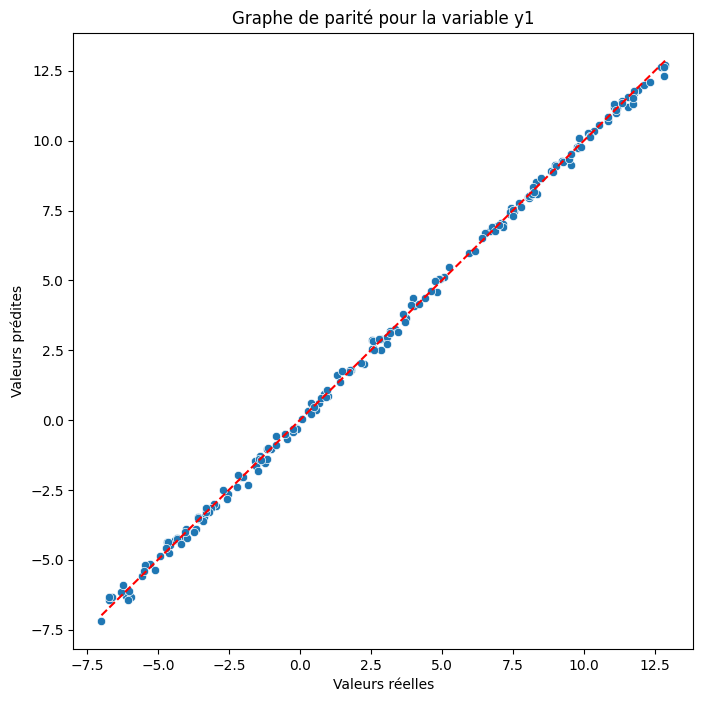

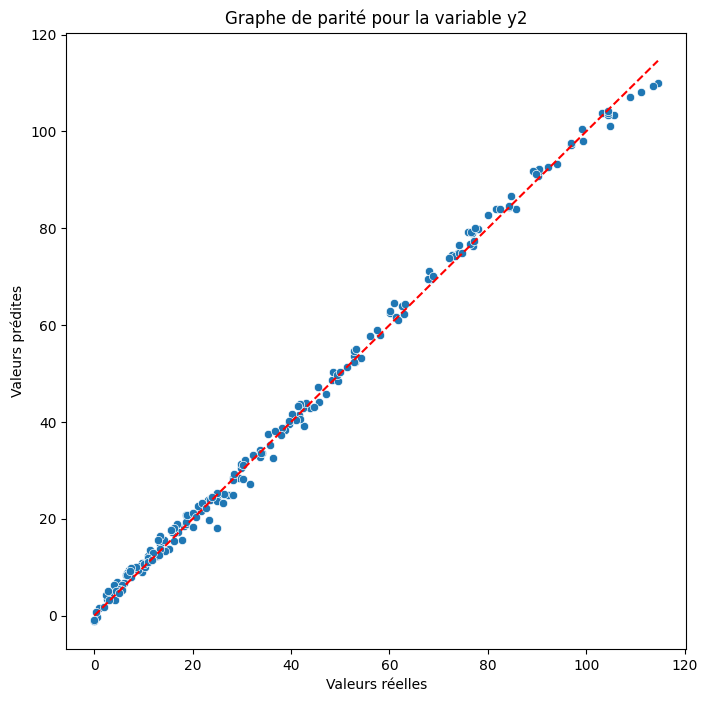

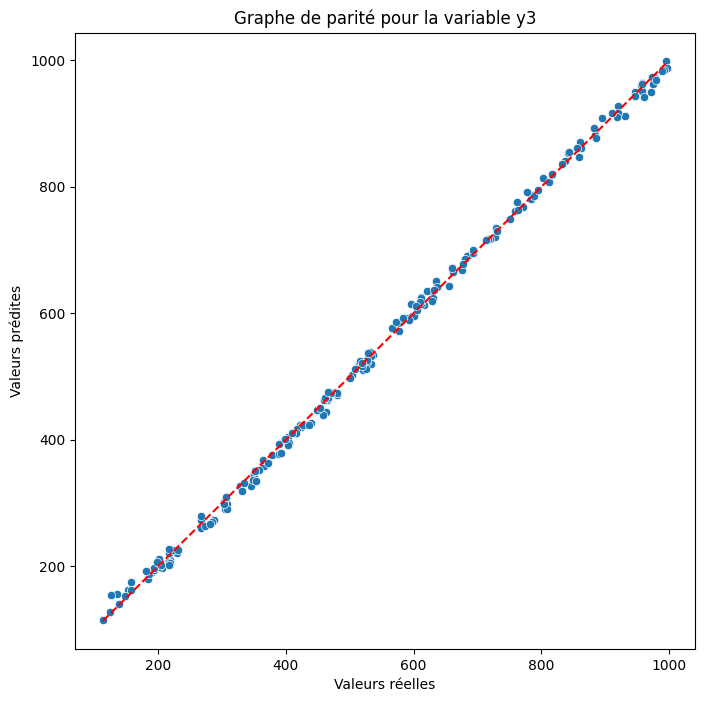

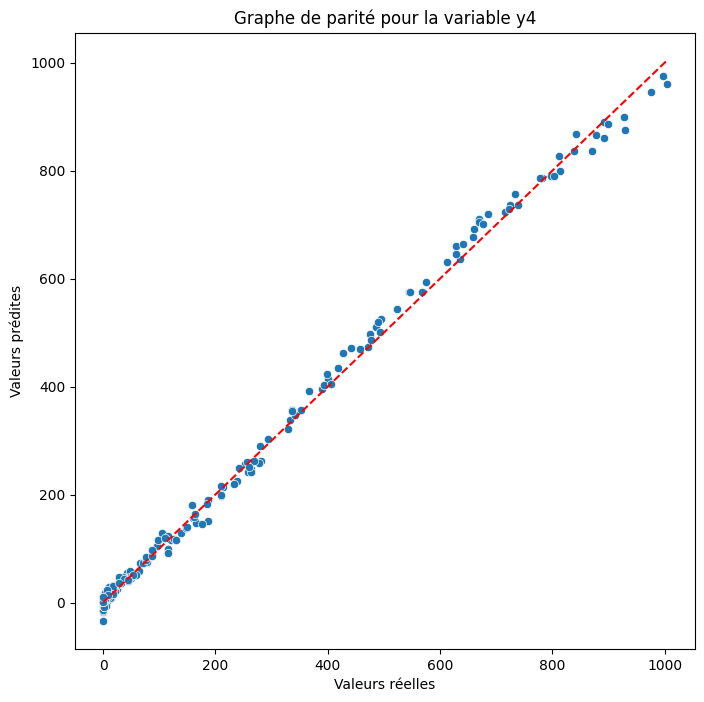

In [25]:
for i in range(len(y.columns)):
    fig = plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test_inv[:, i], y=pred_inv[:, i])
    plt.plot([min(y_test_inv[:, i]), max(y_test_inv[:, i])], [min(y_test_inv[:, i]), max(y_test_inv[:, i])], color='red', linestyle='--')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title(f'Graphe de parité pour la variable {y.columns[i]}')
    plt.show()

---------------
## Data variables qualitatives 
------------------

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel('data_var_quali.xlsx')
data.head()

,X1,X2,X3,X4,X5,Y
0,329,0.154843,6,A,False,1616.742141
1,131,0.655631,5,C,True,561.126205
2,143,0.333411,8,C,True,517.682283
3,461,0.282318,8,C,False,2297.463654
4,275,0.205247,3,C,False,1407.049444


In [27]:
data.shape

(1000, 6)

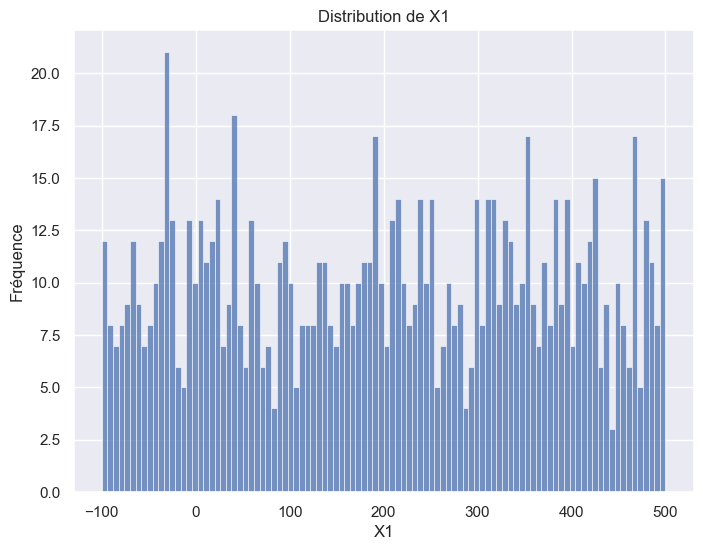

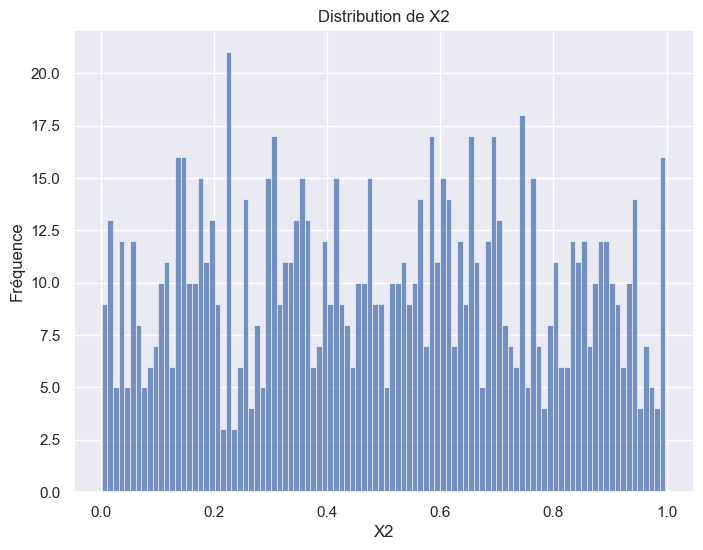

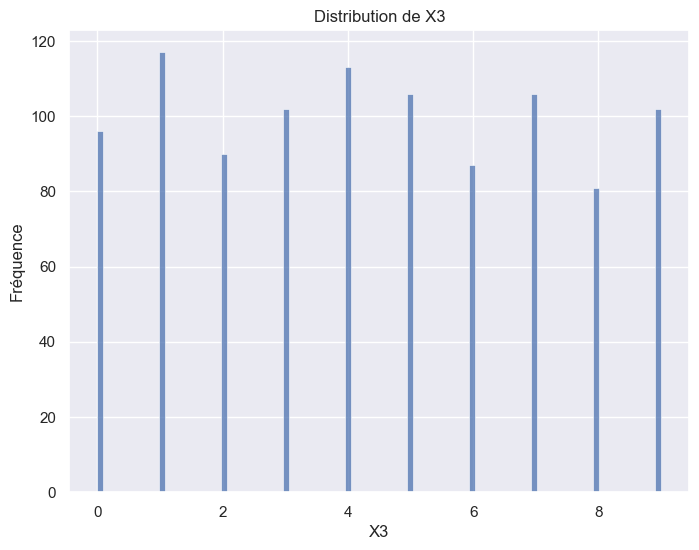

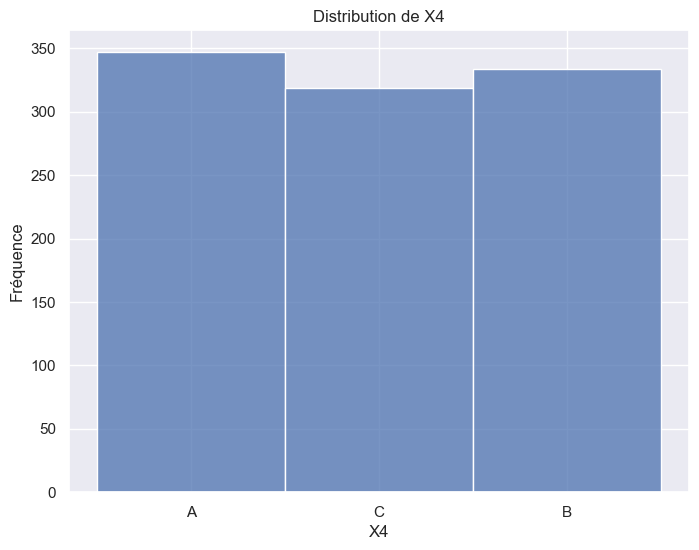

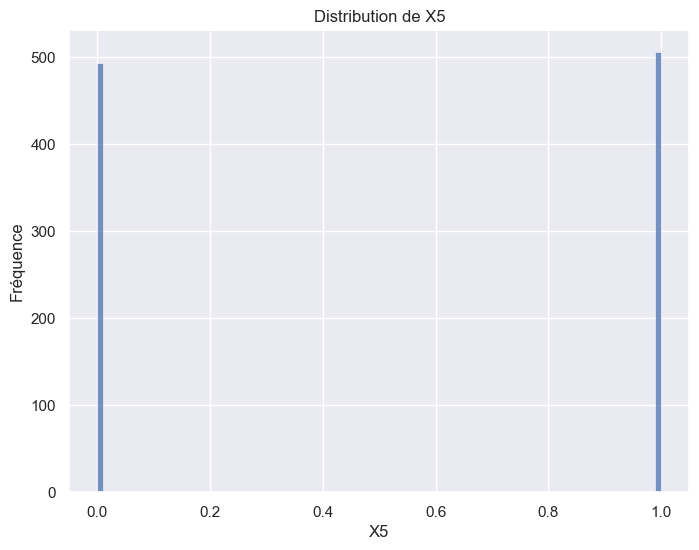

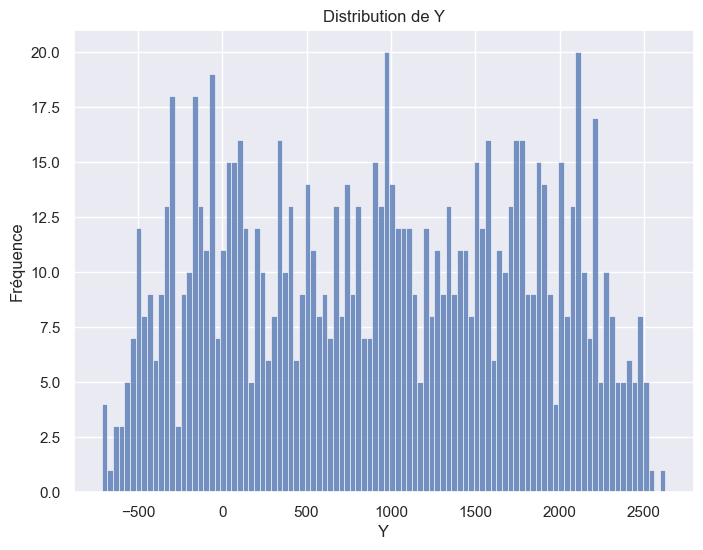

In [31]:
sns.set_theme(style="darkgrid")
for i, column in enumerate(data.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=data[column], kde=False, bins=100)  # Histogramme avec courbe de densité
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

In [3]:
X = data.drop(columns=['Y'])
y = data['Y']

In [4]:
numeric_features = ['X1', 'X2', 'X3']
categorical_features = ['X4', 'X5']

In [5]:
# Extraire la colonne catégorielle
X4 = data['X4'].values.reshape(-1, 1)
print(X4)

[['C']
 ['C']
 ['C']
 ['C']
 ['B']
 ['C']
 ['C']
 ['C']
 ['C']
 ['C']
 ['A']
 ['A']
 ['A']
 ['B']
 ['B']
 ['B']
 ['C']
 ['C']
 ['C']
 ['C']
 ['B']
 ['C']
 ['A']
 ['B']
 ['C']
 ['C']
 ['C']
 ['A']
 ['B']
 ['B']
 ['B']
 ['A']
 ['C']
 ['A']
 ['B']
 ['A']
 ['A']
 ['B']
 ['A']
 ['B']
 ['B']
 ['B']
 ['B']
 ['A']
 ['C']
 ['A']
 ['A']
 ['C']
 ['C']
 ['A']
 ['B']
 ['C']
 ['B']
 ['A']
 ['B']
 ['A']
 ['B']
 ['A']
 ['C']
 ['B']
 ['B']
 ['B']
 ['C']
 ['B']
 ['A']
 ['A']
 ['C']
 ['A']
 ['C']
 ['B']
 ['B']
 ['C']
 ['A']
 ['B']
 ['B']
 ['B']
 ['A']
 ['B']
 ['C']
 ['A']
 ['C']
 ['B']
 ['B']
 ['C']
 ['C']
 ['C']
 ['B']
 ['C']
 ['C']
 ['B']
 ['B']
 ['B']
 ['A']
 ['A']
 ['C']
 ['A']
 ['C']
 ['B']
 ['A']
 ['B']
 ['A']
 ['B']
 ['B']
 ['B']
 ['C']
 ['C']
 ['B']
 ['B']
 ['A']
 ['C']
 ['B']
 ['A']
 ['A']
 ['C']
 ['A']
 ['B']
 ['A']
 ['C']
 ['A']
 ['B']
 ['C']
 ['B']
 ['C']
 ['B']
 ['A']
 ['C']
 ['A']
 ['C']
 ['B']
 ['B']
 ['C']
 ['B']
 ['B']
 ['C']
 ['C']
 ['B']
 ['C']
 ['B']
 ['C']
 ['B']
 ['B']
 ['C']
 ['B']

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(data[numeric_features])
df_num = pd.DataFrame(X_scaled, columns=numeric_features)

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
df_y = pd.DataFrame(y_scaled, columns=['Y'])
df_num.head()


,X1,X2,X3
0,0.735661,-1.224920,0.555789
1,-0.404149,0.570861,0.205133
2,-0.335070,-0.584589,1.257100
3,1.495535,-0.767805,1.257100
4,0.424804,-1.044175,-0.496177


In [6]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded = X_encoded.toarray()
print(X_encoded)


[[1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 ...
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]


In [7]:
l = []
for _ in encoder.categories_:
    l.append(np.array(_))

print(l)
col = np.concatenate(l, axis=0)
print(col)

[array(['A', 'B', 'C'], dtype=object), array([False,  True])]
['A' 'B' 'C' False True]


In [58]:
col = np.concatenate((np.array(encoder.categories_[0]),np.array(encoder.categories_[1])), axis=0)
print(col)

['A' 'B' 'C' False True]


In [59]:

X_encoded_df = pd.DataFrame(X_encoded, columns=col)
X_encoded_df.head()

,A,B,C,False,True
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [60]:
df_encoded = pd.DataFrame(X_encoded, columns=col)
df_encoded.head()

,A,B,C,False,True
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [61]:


df = pd.concat([df_num, df_encoded], axis=1)
df.head()


,X1,X2,X3,A,B,C,False,True
0,0.735661,-1.224920,0.555789,1.0,0.0,0.0,1.0,0.0
1,-0.404149,0.570861,0.205133,0.0,0.0,1.0,0.0,1.0
2,-0.335070,-0.584589,1.257100,0.0,0.0,1.0,0.0,1.0
3,1.495535,-0.767805,1.257100,0.0,0.0,1.0,1.0,0.0
4,0.424804,-1.044175,-0.496177,0.0,0.0,1.0,1.0,0.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2, random_state=42)

In [65]:
# Définir le modèle de réseau de neurones
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),  # Ajouter LeakyReLU après la première couche Dense
    Dense(32),
    LeakyReLU(alpha=0.1),  # Ajouter LeakyReLU après la deuxième couche Dense
    Dense(16),
    LeakyReLU(alpha=0.1),  # Ajouter LeakyReLU après la troisième couche Dense
    Dense(1)  # Une sortie pour la régression
])


# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])


c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [66]:

# Entraîner le modèle
model.fit(X_train, y_train, epochs=200, batch_size=10, validation_split=0.2)

Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7353 - mape: 218.6738 - val_loss: 0.0597 - val_mape: 91.3713
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0360 - mape: 58.2556 - val_loss: 0.0121 - val_mape: 40.8884
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mape: 26.2004 - val_loss: 0.0065 - val_mape: 28.3093
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mape: 33.8167 - val_loss: 0.0042 - val_mape: 21.3268
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mape: 24.3660 - val_loss: 0.0032 - val_mape: 22.2276
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - mape: 73.6094 - val_loss: 0.0026 - val_mape: 16.0166
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mape: 13.1961 - val_loss: 0.0023 - val_mape: 16.8351
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - mape: 21.2237 - val_loss: 0.0020 - val_mape: 19.7398
Epoch 9/200
64/64 ━━━━━━━━━━━━━

In [67]:
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)
err_mse = mean_squared_error(y_test_inv, y_pred_inv)
err_mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
loss = [err_mse, err_mape]
print(f'Loss on test data: mse_{loss[0]}/ mape_{loss[1]}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4288e-04 - mape: 8.9702  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Loss on test data: mse_114.93843095948479/ mape_2.895269412460225


In [8]:
print(encoder.__dict__)
print(encoder.categories_)
print(encoder.drop_idx_)
print(encoder.n_features_in_)
print(encoder._n_features_outs)
print(encoder.feature_name_combiner)
print(np.concatenate((np.array(encoder.categories_[0]),np.array(encoder.categories_[1])), axis=0))
print(encoder.feature_names_in_)

{'categories': 'auto', 'sparse_output': True, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'drop': None, 'min_frequency': None, 'max_categories': None, 'feature_name_combiner': 'concat', '_infrequent_enabled': False, 'n_features_in_': 2, 'feature_names_in_': array(['X4', 'X5'], dtype=object), 'categories_': [array(['A', 'B', 'C'], dtype=object), array([False,  True])], '_drop_idx_after_grouping': None, 'drop_idx_': None, '_n_features_outs': [3, 2]}
[array(['A', 'B', 'C'], dtype=object), array([False,  True])]
None
2
[3, 2]
concat
['A' 'B' 'C' False True]
['X4' 'X5']


In [10]:
df = pd.read_excel('inference_quali.xlsx')
df.head()

,X1,X2,X3,X4,X5
0,400,0.157448,2,A,False
1,366,0.042915,5,A,True
2,456,0.255454,9,A,True
3,205,0.843553,9,A,True
4,427,0.627449,2,B,True


In [11]:
df['X2bis'] = np.where(df['X4'] == 'A', df['X2'] * 0.5,
               np.where(df['X4'] == 'B', df['X2'] * 1,
               np.where(df['X4'] == 'C', df['X2'] * 2, df['X2'])))

biais = np.where(df['X5'] == 'True', -200, 0)
df['Y'] = 5 * df['X1'] + 100 * df['X2bis'] - df['X3'] ** 2 + biais

In [13]:
df.head(10)

,X1,X2,X3,X4,X5,X2bis,Y
0,400,0.157448,2,A,False,0.078724,2003.872387
1,366,0.042915,5,A,True,0.021457,1807.145728
2,456,0.255454,9,A,True,0.127727,2211.772684
3,205,0.843553,9,A,True,0.421777,986.177657
4,427,0.627449,2,B,True,0.627449,2193.744896
5,251,0.582936,9,C,False,1.165872,1290.587226
6,-88,0.891583,1,B,False,0.891583,-351.841743
7,324,0.591773,6,C,False,1.183547,1702.354699
8,-100,0.256391,7,B,False,0.256391,-523.360931
9,464,0.929251,4,A,False,0.464626,2350.462572


In [2]:
data_inference_multi = pd.read_excel('inference_data.xlsx')

In [3]:
data_inference_multi.head()

,x1,x2,x3
0,3.525440,8.121055,907
1,-2.773620,1.221346,660
2,-2.752929,0.625397,974
3,-0.330617,8.386605,935
4,1.498441,1.059716,471


In [4]:
data_inference_multi['y1'] = 2 * data_inference_multi['x1'] + 3
data_inference_multi['y2'] = data_inference_multi['x1'] ** 2 + data_inference_multi['x2'] ** 2
data_inference_multi['y3'] = data_inference_multi['x3'] + 1
data_inference_multi['y4'] = data_inference_multi['x2'] ** 3 + data_inference_multi['x2']

In [6]:
data_inference_multi.head(15)

,x1,x2,x3,y1,y2,y3,y4
0,3.525440,8.121055,907,10.050879,78.380259,908,543.717098
1,-2.773620,1.221346,660,-2.547241,9.184656,661,3.043209
2,-2.752929,0.625397,974,-2.505858,7.969741,975,0.870004
3,-0.330617,8.386605,935,2.338767,70.444451,936,598.259675
4,1.498441,1.059716,471,5.996881,3.368322,472,2.249774
5,-1.455752,4.147475,578,0.088495,19.320764,579,75.490474
6,-4.690898,4.716964,228,-6.381796,44.254278,229,109.668251
7,3.527605,6.285058,385,10.055211,51.945959,386,254.557171
8,1.539428,5.957948,662,6.078857,37.866984,663,217.448082
9,-4.217685,5.554547,474,-5.435370,48.641861,475,176.928970


In [ ]:
s